<a href="https://colab.research.google.com/github/elsioantunes/proc-video/blob/main/procVideoLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de video LAB 4 - Histogramas
Objetivos:

1. We will learn the concepts of histogram equalization and use it to improve the contrast of our images.
 $\color{#00DD00}{\text{OK}}$
2. FOO bar $\color{#DD0000}{\text{not OK}}$






##Open image

Mounted at /content/drive


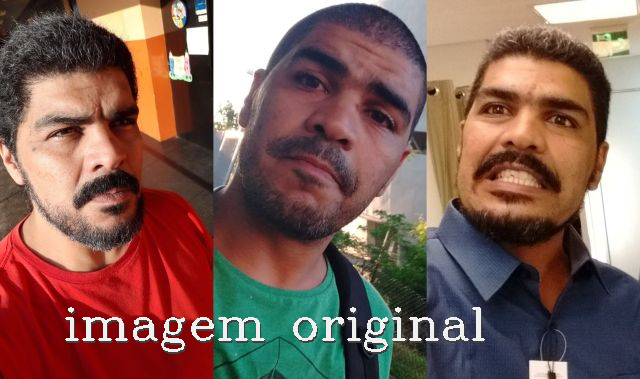

height:  379 width:  640 channels:  3


In [ ]:
import numpy as np
import random
import cv2 as cv
from base64 import b64encode
from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import HTML
 
#https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html
 
drive.mount('/content/drive')
img = cv.imread('/content/drive/MyDrive/((UFABC))/(proc video)/elsios.jpg')
height, width, channels = img.shape
 
myBgColor = (255, 245, 245)
 
def newEmptyImg(w=width, h=height, corRGB=myBgColor):
    b, g, r = corRGB
    emptyImg = np.zeros((h, w, 3), np.uint8)
    emptyImg[:, :] = (r, g, b)
    return emptyImg
 
def overlay(bg, img, x, y):
    h, w, _ = img.shape
    bg[y:h + y, x:w + x] = img
    return bg
 
def tableShow(m):
    hl, wl, h, w, _ = np.array(m).shape
    bg = newEmptyImg(w*wl + 5*wl+5, h*hl + 5*hl+5, myBgColor)
    for i, lin in enumerate(m):
        for j, col in enumerate(lin):
            bg = overlay(bg, col, 5 + (5 + width) * j, 5 + (5 + height) * i)
    return bg
 
def text(img, txt, w = int(width/10), h = int(9*height/10)):
    imgtmp = img.copy()
    cv.putText(imgtmp, txt, (w, h), cv.FONT_HERSHEY_COMPLEX, 1.5, (64, 64, 64), 2)
    cv.putText(imgtmp, txt, (w-1, h-2), cv.FONT_HERSHEY_COMPLEX, 1.5, (240, 240, 240), 2)
    return imgtmp
 
def show(img, title=""):
    return cv2_imshow(text(img, title))
 
nullSrc = newEmptyImg()
 
show(img, "imagem original")
print("height: ", height, "width: ", width, "channels: ", channels)

# histograma 
*   É a representação gráfica da distribuição de frequência de intensidades da imagem
*   Histograma é um gráfico de barras em que cada barra representa a quantidade de um determinado ítem contável num conjunto de conjuntos contáveis. No nosso caso, a imagem é uma conjunto de pixels de uma determinada intensidade. Cada barra do histograma então, representará o número de vezes em que cada intensidade está presente no conjunto de pixels desta imagem.





## Gerando a imagem do histograma
Diferentemente da lib Matplotlib, a OpenCV não nos fornece um mecanismo nativo de exibição do histograma. Mas não é difícil implementar um, utilizando cv.line, cv.polylines ou mesmo montando as barras manualmente a partir da matriz da imagem.

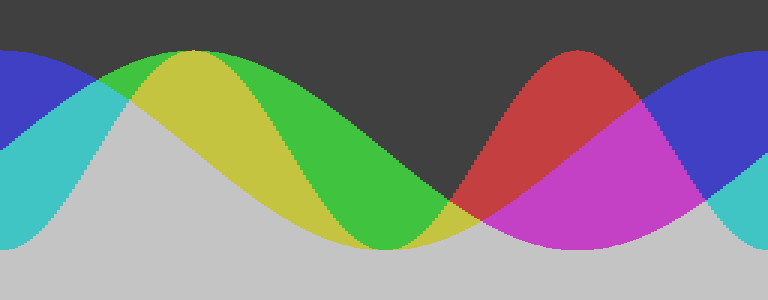

In [ ]:
def funcCos(i):
    return np.uint8(np.cos(2*np.pi*i/256)*100+150)

def funcSin(i):
    return np.uint8(np.sin(2*np.pi*i/256)*100+150)

def funcPit(i):
    return np.uint8(np.sin(2*np.pi*i/256)*np.sin(2*np.pi*i/256)*200+50)

bg = newEmptyImg(256*3,300, (64, 64, 64))
for i in range(256):
    z1 = funcCos(i)
    z2 = funcSin(i)
    z3 = funcPit(i)

    bg[300-z1:, i*3:i*3+3, 0] = 196
    bg[300-z2:, i*3:i*3+3, 1] = 196
    bg[300-z3:, i*3:i*3+3, 2] = 196

show(bg)

Para contar as intensidades de cada canal de cor de uma imagem, podemos utilizar uma função na biblioteca `numpy`, mas a biblioteca `OpenCV` nos fornece também uma forma de obter esta contagem, segundo a documentação, várias vezes mais rápida que a `numpy`, talvez pelo simples fato de especializar o algoritmo para trabalhar com inteiros de oito bits sem sinal (`uint8`).

In [ ]:
hist = cv.calcHist([img], [2], None, [256], [0, 256]).flatten()
hist

array([  304.,    53.,    68.,    83.,   132.,   142.,   150.,   200.,
         242.,   245.,   279.,   269.,   330.,   343.,   433.,   451.,
         510.,   590.,   681.,   750.,   880.,  1001.,  1049.,  1125.,
        1254.,  1391.,  1407.,  1496.,  1691.,  1699.,  1726.,  1771.,
        1769.,  1823.,  1870.,  1776.,  1730.,  1685.,  1629.,  1623.,
        1663.,  1592.,  1673.,  1702.,  1606.,  1635.,  1702.,  1492.,
        1469.,  1341.,  1352.,  1243.,  1221.,  1224.,  1134.,  1078.,
        1067.,  1125.,  1040.,  1003.,   994.,  1038.,   960.,   991.,
         966.,   991.,   944.,   985.,   938.,   901.,   949.,   893.,
         864.,   873.,   810.,   832.,   850.,   835.,   883.,   858.,
         825.,   808.,   847.,   805.,   774.,   784.,   818.,   826.,
         807.,   837.,   757.,   818.,   774.,   738.,   804.,   829.,
         859.,   894.,   901.,   807.,   895.,   879.,   853.,   841.,
         887.,   901.,   887.,   882.,   846.,   837.,   953.,   985.,
      

## três canais
O comando `cv.calcHist()` faz a contagem para cada canal. Cabe ao programador repetir o cálculo para cada canal disponível e fazer a normalização, pois o valor da contagem pode ser arbitrário, mas a altura do histograma precisa ser determinado.

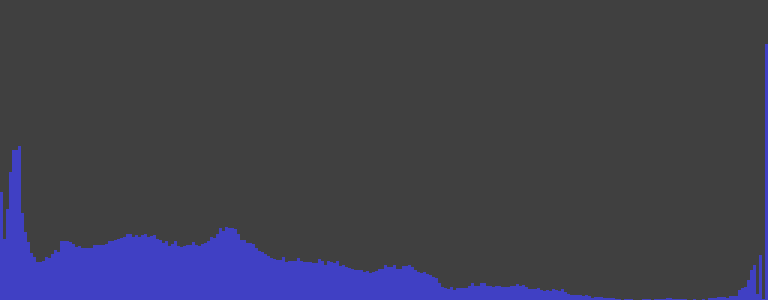

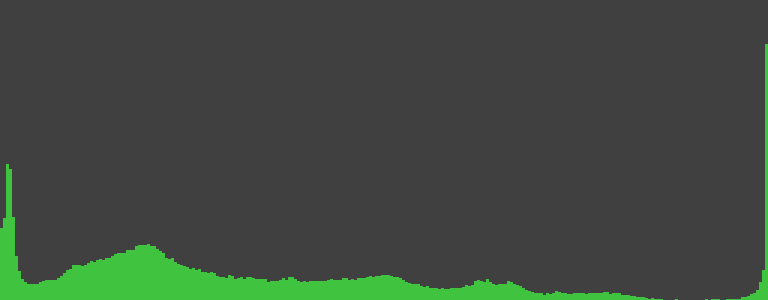

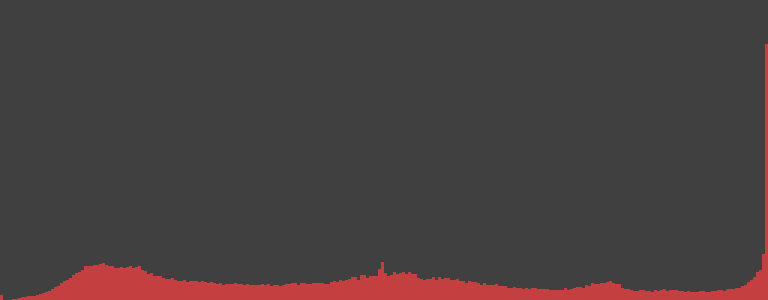

In [ ]:
def histograma(img):
    histR = cv.calcHist([img], [2], None, [256], [0, 256]).flatten()
    histG = cv.calcHist([img], [1], None, [256], [0, 256]).flatten()
    histB = cv.calcHist([img], [0], None, [256], [0, 256]).flatten()

    cv.normalize(histR, histR, 0, 256, cv.NORM_MINMAX)
    cv.normalize(histG, histG, 0, 256, cv.NORM_MINMAX)
    cv.normalize(histB, histB, 0, 256, cv.NORM_MINMAX)

    bg1 = newEmptyImg(256*3,300, (64, 64, 64))
    bg2 = newEmptyImg(256*3,300, (64, 64, 64))
    bg3 = newEmptyImg(256*3,300, (64, 64, 64))
    
    for i in range(256):
        bg1[300-int(histB[i]):, i*3:i*3+3, 0] = 196
        bg2[300-int(histG[i]):, i*3:i*3+3, 1] = 196
        bg3[300-int(histR[i]):, i*3:i*3+3, 2] = 196

    show(bg1)
    show(bg2)
    show(bg3)

histograma(img)

## exploração de espaço de cores
A observação do histograma nos permite observar a exploração do espaço disponível de cores. Por exemplo, se o gráfico mostrar uma compressão dos canais na primeira parte do gráfico, significa que a imagem está mais escura e que poderia ser clareada sem perda de qualidade

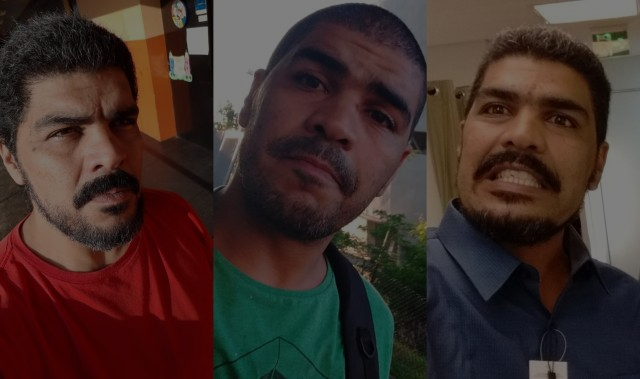

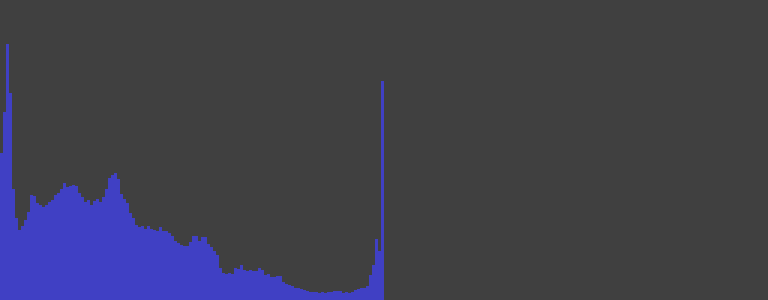

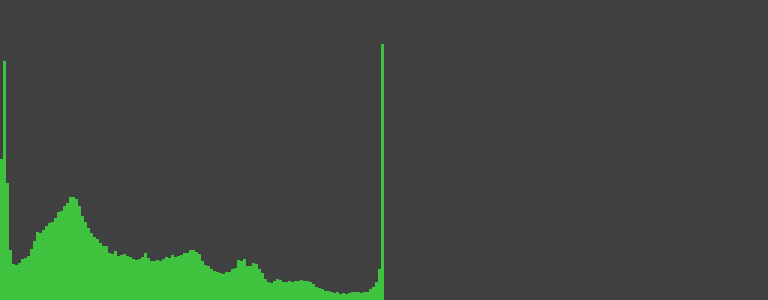

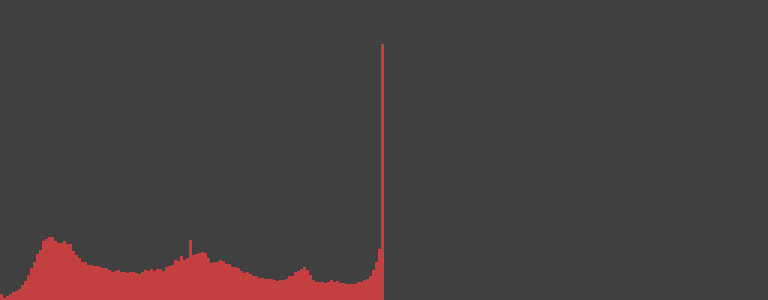

In [ ]:
img2 = img.copy()
for i, lin in enumerate(img):
    for j, col in enumerate(lin):
        img2[i][j] = img[i][j]/2
show(img2)         
histograma(img2)

## Bright e Contrast
Outras características que podem ser vistas pelo histograma, e que na verdade é uma consequência da manipulação da onda, variando em escala e deslocamento

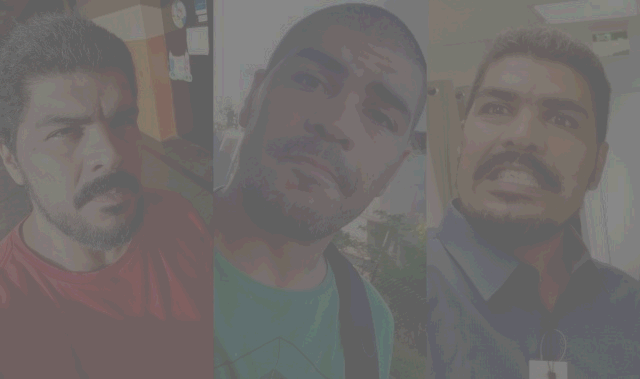

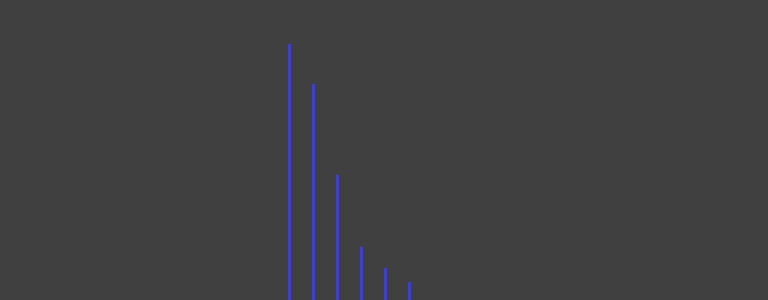

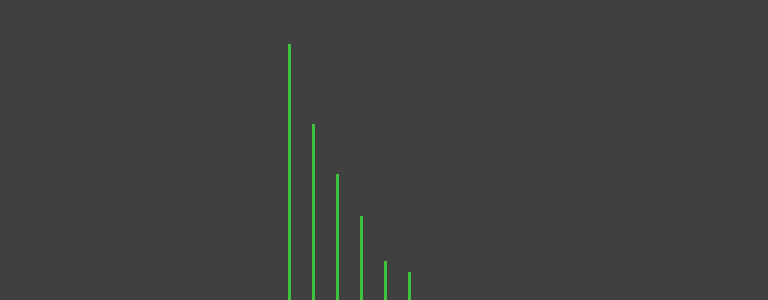

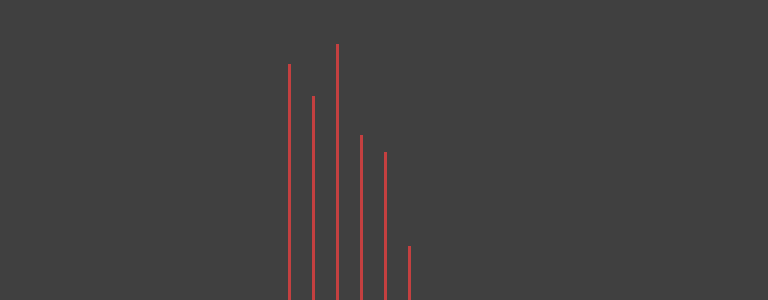

In [ ]:
img2 = img.copy()
for i, lin in enumerate(img):
    for j, col in enumerate(lin):
        img2[i][j] = img[i][j]/51 + 16 

for i, lin in enumerate(img):
    for j, col in enumerate(lin):
        img2[i][j] = img2[i][j]*8 - 32

show(img2)         
histograma(img2)

## Filtros
Alguns filtros, inclusive, são fruto de movimentações e manipulações das quantidades de cores da imagem, podendo ser visualizadas via histograma.

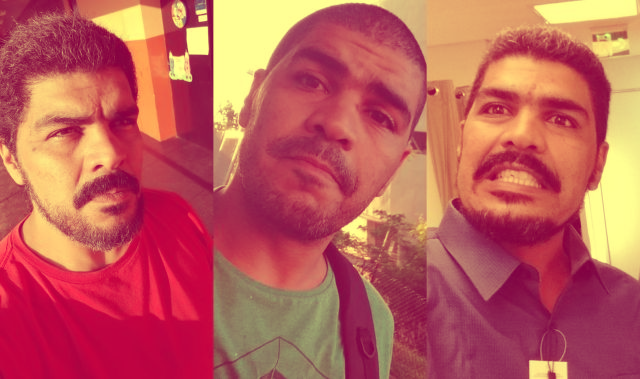

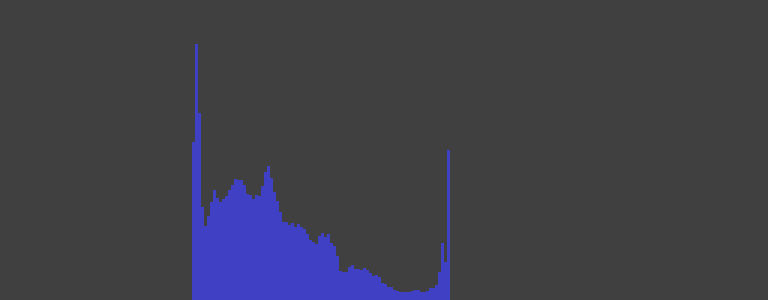

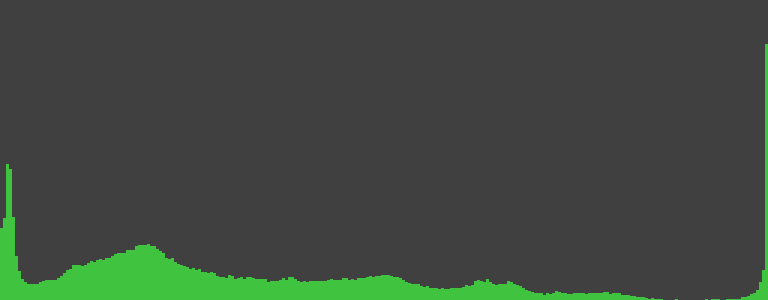

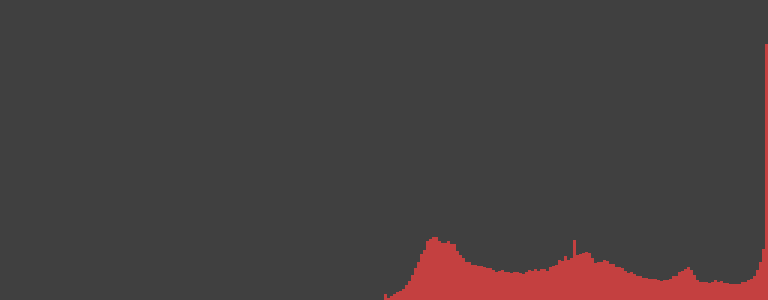

In [ ]:
img2 = img.copy()
for i, lin in enumerate(img):
    for j, col in enumerate(lin):
        
        img2[i][j][0] = img[i][j][0]/3 + 64  
        img2[i][j][1] = img[i][j][1]
        img2[i][j][2] = img[i][j][2]/2 + 128  


show(img2)         
histograma(img2)

## Equalização
Outro cálculo bastante estudado é a equalização de histogramas
não deu tempo :(

In [ ]:
equ = cv.equalizeHist(img)
res = np.vstack((img,equ)) 


show(res)
histograma(res)

error: ignored

# Conclusão

Este experimento serviu para mostrar que o meu cálculo é praticamente o mesmo feito pela biblioteca openCV - claro, ambos estão seguindo a teoria. No entanto o resultado obtido não é o que eu esperava de uma imagem reduzida às cores R,G,B,Y,M,C. Quando aumentamos ao máximo o contraste de uma imagem no photoshop temos a nossa intuição satisfeita como esperado: 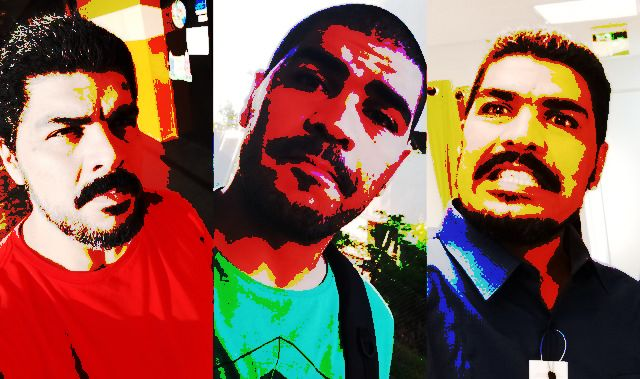 

O que nos leva a observar algumas coisas: primeiro que o cálculo tenta obter (sem sucesso) a crominância em regiões em que o pixel é preto ou branco, obtendo qualquer coisa. As componentes de luminância e saturação devem, portanto, ser fundamentais para determinação de faixas de cores do espectro. Talvez por isso tantas formas de interpretar o espaço de cores são disponibilizadas. Por fim, ficou claro que um algoritmo baseado em contraste seria muito mais eficiente.   


Página do github: https://elsioantunes.github.io/proc-video/

# Video


frame count: 272.0
width, height, fps: 1920 1080 29.58401109883815
frame:0


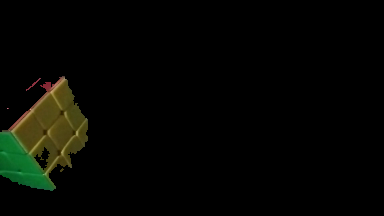

frame:1


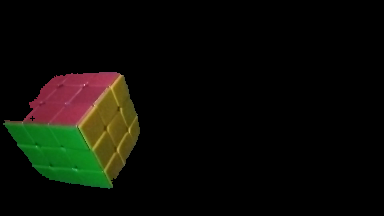

frame:2


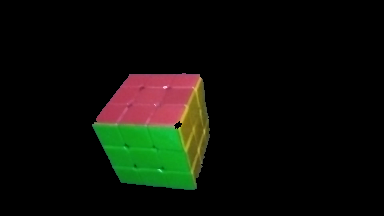

frame:3


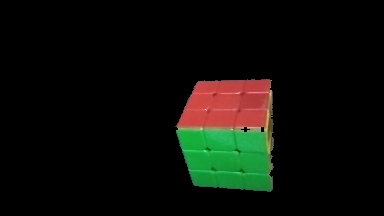

frame:4


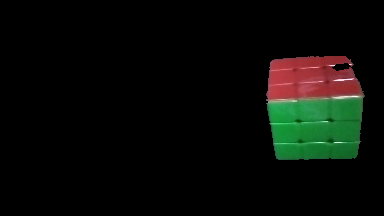

frame:5


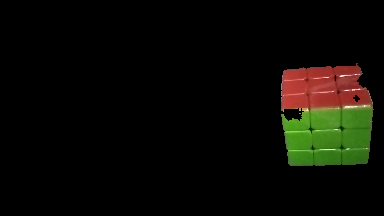

frame:6


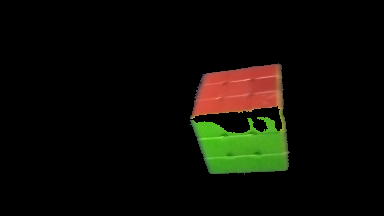

frame:7


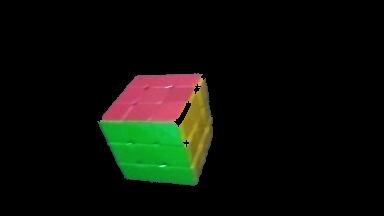

frame:8


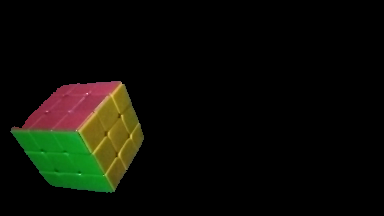

frame:9


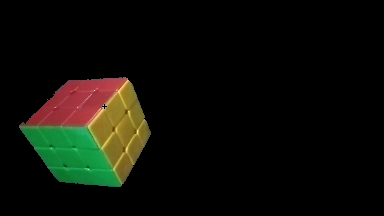

In [ ]:
def process(frameTest):
    verde = np.array([29, 162, 16])
    vermelho = np.array([95, 70, 189])
    amarelo = np.array([24, 109, 124])

    maskFrameGreen = cv.inRange(frameTest, verde-74, verde+74)
    maskFrameRed = cv.inRange(frameTest, vermelho-57, vermelho+57)
    maskFrameYellow = cv.inRange(frameTest, amarelo-54, amarelo+54)

    redOrGreen = cv.bitwise_or(maskFrameRed, maskFrameGreen)
    redOrGreenOrYellow = cv.bitwise_or(redOrGreen, maskFrameYellow)

    kernel = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
    maskOpen = cv.morphologyEx(redOrGreenOrYellow, cv.MORPH_OPEN, kernel)

    kernel = cv.getStructuringElement(cv.MORPH_CROSS,(25,25))
    maskClose = cv.morphologyEx(maskOpen, cv.MORPH_CLOSE, kernel)

    maskedFrame = cv.bitwise_and(frameTest, frameTest, mask=maskClose)
    return maskedFrame

inUrl = '/content/drive/MyDrive/((UFABC))/(proc video)/rubik4.mp4'
outUrl = '/content/drive/MyDrive/((UFABC))/(proc video)/teste.webm'
saida = None

def openVideo(url):
    cap = cv.VideoCapture(url)
    ret, frame = cap.read()
    vheight, vwidth = frame.shape[:2]
    fps = cap.get(cv.CAP_PROP_FPS)
    print("frame count:", cap.get(cv.CAP_PROP_FRAME_COUNT))
    print("width, height, fps:", vwidth, vheight, fps)
    return cap

def newVideo(frame):
    fourcc = cv.VideoWriter_fourcc(*'VP90')
    vheight, vwidth = frame.shape[:2]
    return cv.VideoWriter(outUrl, fourcc, 25, (vwidth, vheight))

 
x = 0
i = 0
frames = []
cap = openVideo(inUrl)

while True:
    ret, atualFrame = cap.read()
    if ret: 
        atualFrame = process(atualFrame)
        atualFrame = cv.resize(atualFrame, (384, 216))
        
        if saida == None: 
            saida = newVideo(atualFrame)
        saida.write(atualFrame)

        if (x % 30) == 0:
            print (f"frame:{i}")
            frames.append(atualFrame)
            show(atualFrame) 
            i = i + 1
        x = x + 1
    else: break

cap.release()
saida.release()

In [ ]:
video = open(outUrl, 'rb').read()
vidDec = "data:video/mp4;base64," + b64encode(video).decode()
HTML(f'<video width={vwidth} controls><source src= "{vidDec}" type="video/mp4"></video>')

##teste

frame count: 290.0
width, height, fps: 1920 1080 29.773210270730882
frame:0


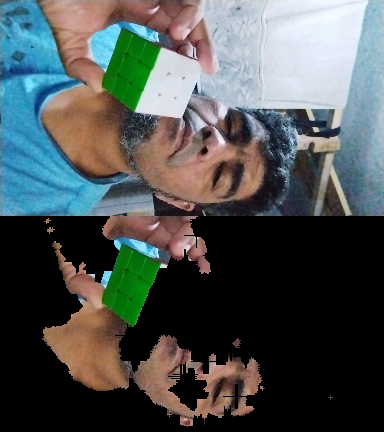

frame:1


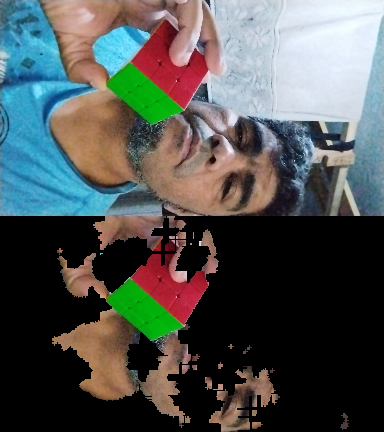

frame:2


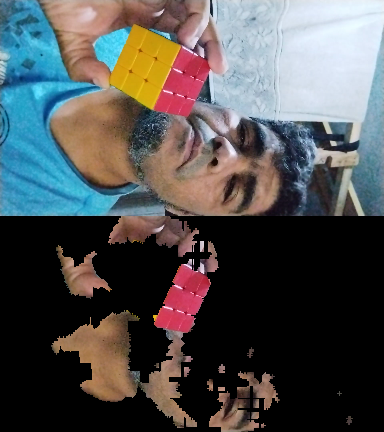

frame:3


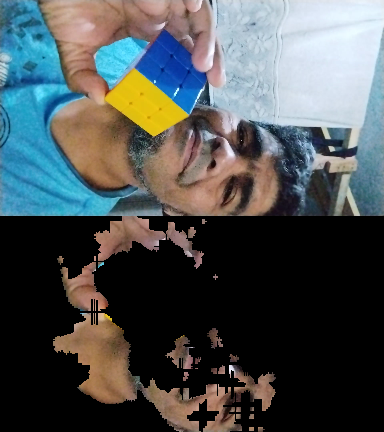

frame:4


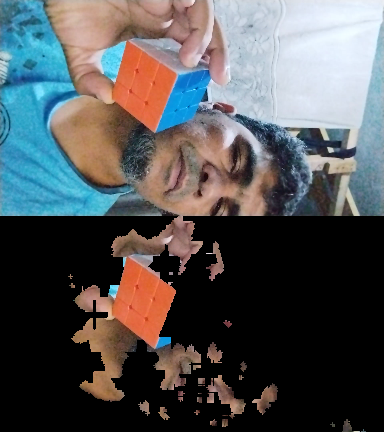

frame:5


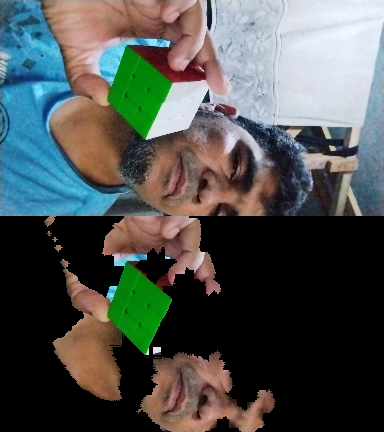

frame:6


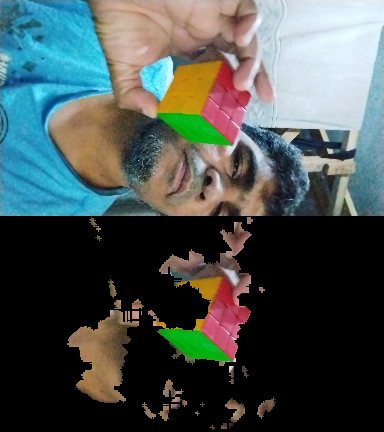

frame:7


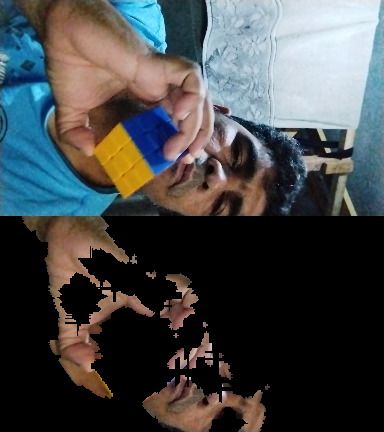

frame:8


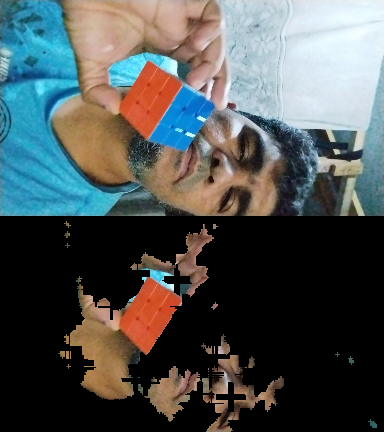

frame:9


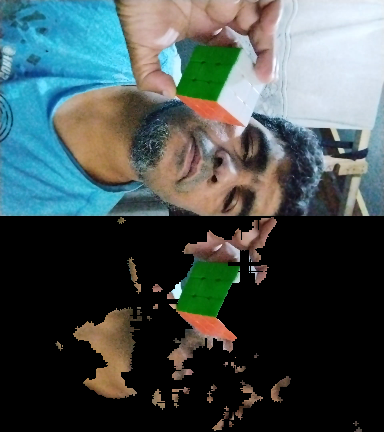

In [ ]:
inUrl = '/content/drive/MyDrive/((UFABC))/(proc video)/elsioRubik4.mp4'
outUrl = '/content/drive/MyDrive/((UFABC))/(proc video)/testeR4.mp4'
saida = None

cap = cv.VideoCapture(inUrl)
ret, frame = cap.read()
vheight, vwidth = frame.shape[:2]
fps = cap.get(cv.CAP_PROP_FPS)
print("frame count:", cap.get(cv.CAP_PROP_FRAME_COUNT))
print("width, height, fps:", vwidth, vheight, fps)
neww, newh = int(vwidth), int(vheight)

#fourcc = cv.VideoWriter_fourcc(*'VP90')
fourcc = cv.VideoWriter_fourcc(*'MP4V')
 
x = 0
i = 0
frame = []
while True:
    ret, atualFrame = cap.read()
    if ret: 
        atualFrame = cv.resize(atualFrame, (384, 216))
        processFrame = process(atualFrame)
        atualFrame = cv.vconcat([atualFrame, processFrame])

        if saida == None:
            vheight, vwidth = atualFrame.shape[:2]
            saida = cv.VideoWriter(outUrl, fourcc, 25, (vwidth, vheight))
        saida.write(atualFrame)

        if (x % 30) == 0:
            print (f"frame:{i}")
            frame.append(atualFrame)
            show(atualFrame) 
            i = i + 1

        x = x + 1
    else: break

cap.release()
saida.release()

# REFERÊNCIAS
* Sete ferramentas da qualidade <BR>
https://pt.wikipedia.org/wiki/Sete_ferramentas_da_qualidade

#teste


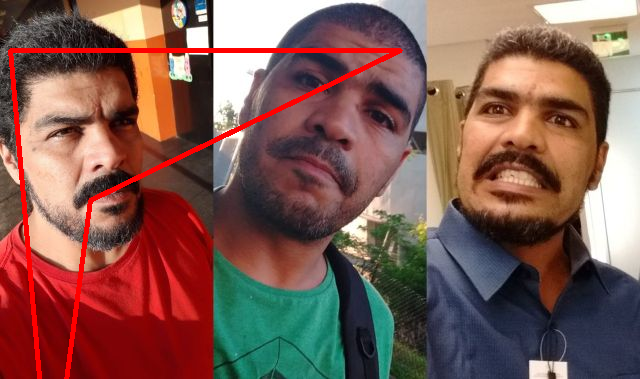

In [ ]:
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)
# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))
img2 = img.copy()
cv.polylines(img2, [pts], True, (0, 0, 255), 3)
show(img2)

In [ ]:
hist = cv.calcHist([img], [0], None, [1], [0, 255])
hist

array([[236089.]], dtype=float32)

# Flags


In [ ]:
lim = 0
for it in dir(cv):
    lim = lim + len(it)
    if lim > 200:
        lim = 0
        print()
    print (it, end=' ')

 ACCESS_FAST ACCESS_MASK ACCESS_READ ACCESS_RW ACCESS_WRITE ADAPTIVE_THRESH_GAUSSIAN_C ADAPTIVE_THRESH_MEAN_C AGAST_FEATURE_DETECTOR_AGAST_5_8 AGAST_FEATURE_DETECTOR_AGAST_7_12D 
AGAST_FEATURE_DETECTOR_AGAST_7_12S AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION AGAST_FEATURE_DETECTOR_OAST_9_16 AGAST_FEATURE_DETECTOR_THRESHOLD AKAZE AKAZE_DESCRIPTOR_KAZE AKAZE_DESCRIPTOR_KAZE_UPRIGHT AKAZE_DESCRIPTOR_MLDB 
AKAZE_DESCRIPTOR_MLDB_UPRIGHT AKAZE_create AffineTransformer AgastFeatureDetector AgastFeatureDetector_AGAST_5_8 AgastFeatureDetector_AGAST_7_12d AgastFeatureDetector_AGAST_7_12s AgastFeatureDetector_NONMAX_SUPPRESSION 
AgastFeatureDetector_OAST_9_16 AgastFeatureDetector_THRESHOLD AgastFeatureDetector_create Algorithm AlignExposures AlignMTB AsyncArray BFMatcher BFMatcher_create BORDER_CONSTANT BORDER_DEFAULT BORDER_ISOLATED BORDER_REFLECT BORDER_REFLECT101 
BORDER_REFLECT_101 BORDER_REPLICATE BORDER_TRANSPARENT BORDER_WRAP BOWImgDescriptorExtractor BOWKMeansTrainer BOWTrainer BRISK BRISK_c

# KMeans

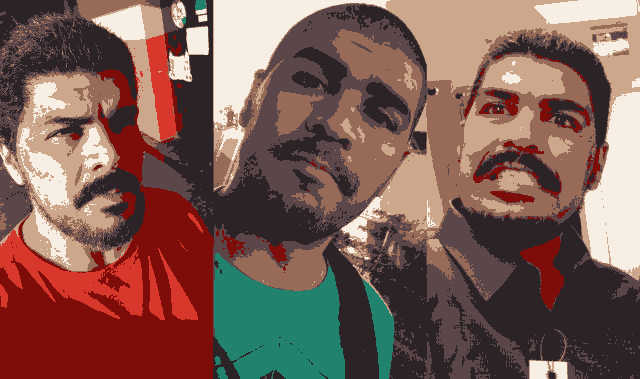

In [ ]:
# https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html
Z = img.reshape((-1,3))
Z = np.float32(Z)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS

ret, label, center = cv.kmeans(Z, K, None, criteria, attempts, flags)
center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape(img.shape)
show(res)